In [89]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Correlation analysis 


### Import dataset

In [88]:
data = pd.read_csv('SMSSpamCollection.csv', delimiter='\t', names=['type', 'body'])

In [3]:
data = data.sort_values('type').reset_index(drop=True)

In [5]:
data.groupby('type').size()

type
ham     4825
spam     747
dtype: int64

### Apply TF-IDF in body

In [6]:
dataset_themes = data.groupby('type')
group_data = dataset_themes.apply(lambda x: x.body.str.cat())

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=0.0, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(group_data)

In [8]:
all_features_names = tfidf_vectorizer.get_feature_names()

In [9]:
dense_tfidf = tfidf.todense()

In [10]:
dense_tfidf.shape

(2, 10415)

### Correlation between types


In [11]:
sns.set(style="white")
correlation = pd.DataFrame(dense_tfidf, index=['ham', 'spam'])
corr = correlation.T.corr()

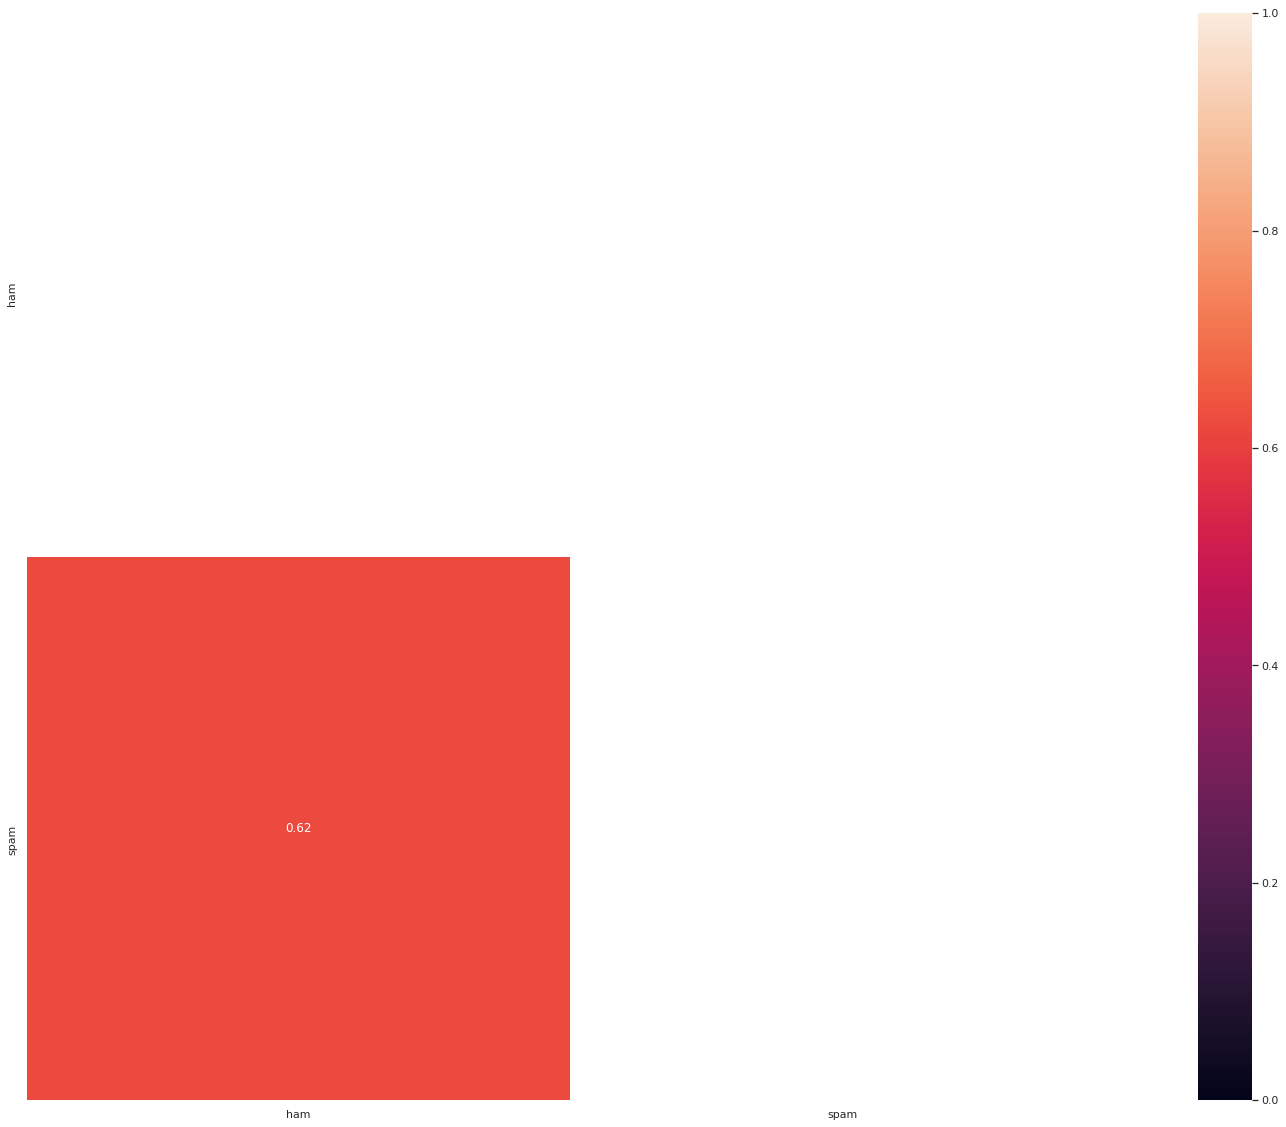

In [12]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, mask=mask,vmin=0, vmax=1, annot=True , linewidths=.5, ax=ax, square=True)